In [36]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

# Hyperparameters
SEED = 5388

key = jax.random.PRNGKey(SEED)

## Gaussian

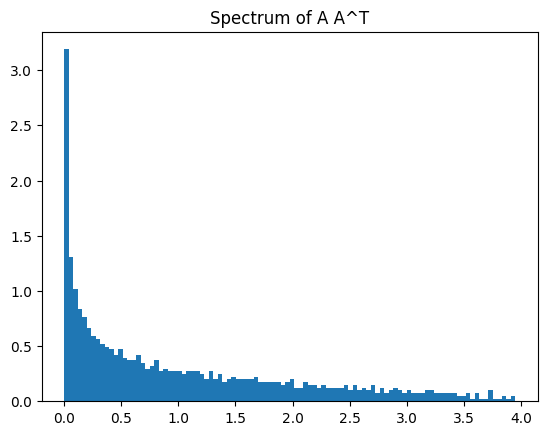

In [37]:
# Generate random gaussian matrix of size MxM
M = 2**10


key, key_A = jax.random.split(key)
A = 1/jnp.sqrt(M)*jax.random.normal(key_A, (M, M))

# Plot kde of spectrum of A
eigs = jnp.linalg.eigvals(A@A.T).real
plt.hist(eigs, bins=100, density=True)
plt.title("Spectrum of A A^T")
plt.show()

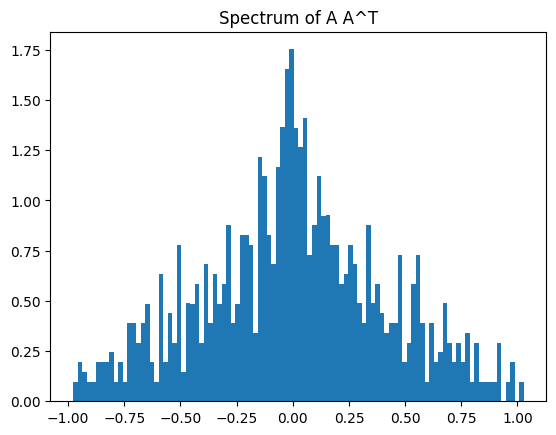

In [38]:
key, key_A2 = jax.random.split(key)
A2 = 1/jnp.sqrt(M)*jax.random.normal(key_A2, (M, M))


# Plot kde of spectrum of A
eigs = jnp.linalg.eigvals(A@A2.T).real
plt.hist(eigs, bins=100, density=True)
plt.title("Spectrum of A A^T")
plt.show()

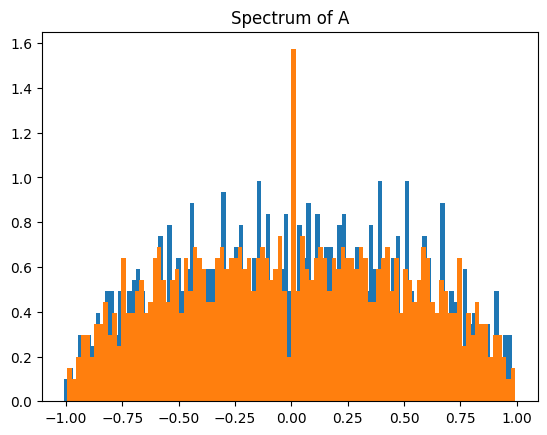

In [39]:
# Plot kde of spectrum of A
eigs = jnp.linalg.eigvals(A)

plt.hist(eigs.real, bins=100, density=True, label="Real")
plt.hist(eigs.imag, bins=100, density=True, label="Imaginary")

plt.title("Spectrum of A")
plt.show()

## Gaussian Hadamard

In [40]:
M = 2**10
H = scipy.linalg.hadamard(M)/jnp.sqrt(M)

key, *keys_D = jax.random.split(key, 5)
Ds = [jax.random.normal(keys_D[i], (M,)) for i in range(4)] 

B = H @ jnp.diag(Ds[0]) 
B2 = H @ jnp.diag(Ds[1]) 
# B = B @ H.T @ jnp.diag(Ds[1])
#B = B @ H @ jnp.diag(Ds[2])

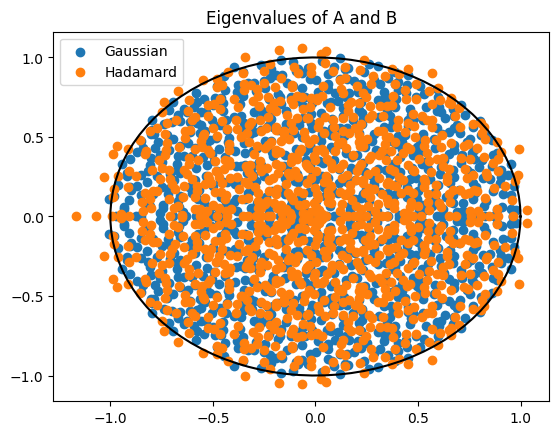

In [41]:
# Scatter eigenvalues of B on complex plane

eigs = jnp.linalg.eigvals(A)
plt.scatter(eigs.real, eigs.imag, label='Gaussian')

eigs = jnp.linalg.eigvals(B)
plt.scatter(eigs.real, eigs.imag, label='Hadamard')

# plot a unit circle
t = jnp.linspace(0, 2*jnp.pi, 100)
plt.plot(jnp.cos(t), jnp.sin(t), color='black')

plt.title("Eigenvalues of A and B")
plt.legend()
plt.show()

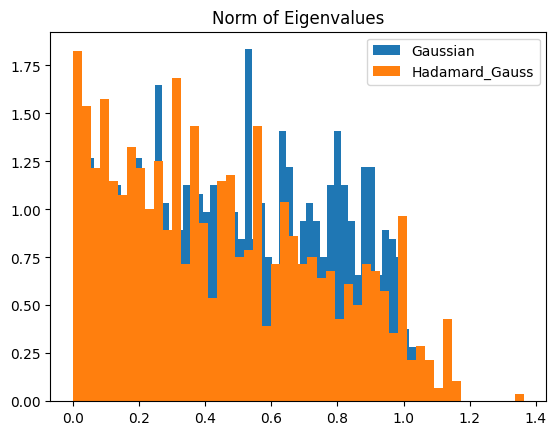

In [42]:
eigs = jnp.linalg.eigvals(A)
norms = eigs.real**2 + eigs.imag**2
plt.hist(norms, bins=50, label='Gaussian', density=True)

eigs = jnp.linalg.eigvals(B)
norms = eigs.real**2 + eigs.imag**2
plt.hist(norms, bins=50, label='Hadamard_Gauss', density=True)

plt.title("Norm of Eigenvalues")
plt.legend()
plt.show()

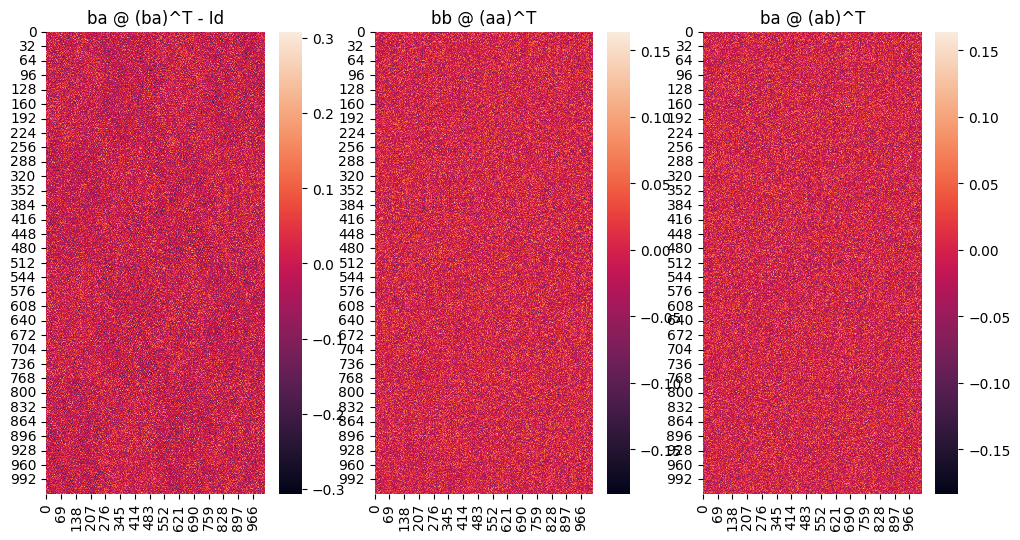

In [43]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot heatmap of A @ A.T on the first subplot
sns.heatmap(B2 @ B @ (B2 @ B).T - jnp.eye(M), ax=axes[0])
axes[0].set_title("ba @ (ba)^T - Id")

# Plot heatmap of B @ B.T on the second subplot
sns.heatmap(B2 @ B2 @ B.T @ B.T, ax=axes[1])
axes[1].set_title("bb @ (aa)^T")

# Plot heatmap of B @ B.T on the second subplot
sns.heatmap(B2 @ B @ (B @ B2).T, ax=axes[2])
axes[2].set_title("ba @ (ab)^T")

# Show the plots
plt.show()

## Tanh Hadamard

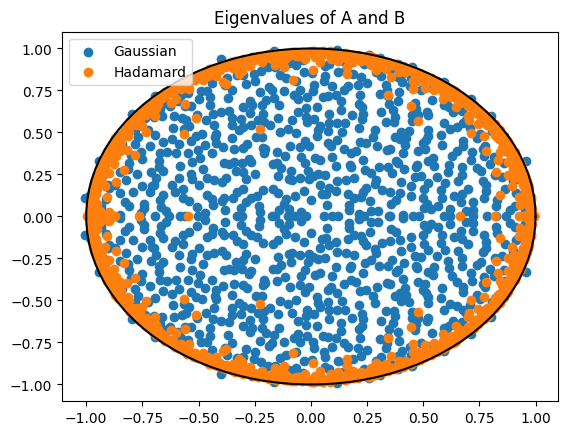

In [44]:
M = 2**10
H = scipy.linalg.hadamard(M)/jnp.sqrt(M)

key, *keys_D = jax.random.split(key, 2)
Ds = [jax.random.normal(keys_D[i], (M,)) for i in range(len(keys_D))] 

B = H @ jnp.diag(jnp.tanh(20 * Ds[0])) 


# Scatter eigenvalues of B on complex plane

eigs = jnp.linalg.eigvals(A)
plt.scatter(eigs.real, eigs.imag, label='Gaussian')

eigs = jnp.linalg.eigvals(B)
plt.scatter(eigs.real, eigs.imag, label='Hadamard')

# plot a unit circle
t = jnp.linspace(0, 2*jnp.pi, 100)
plt.plot(jnp.cos(t), jnp.sin(t), color='black')

plt.title("Eigenvalues of A and B")
plt.legend()
plt.show()

## Uniform Hadamard

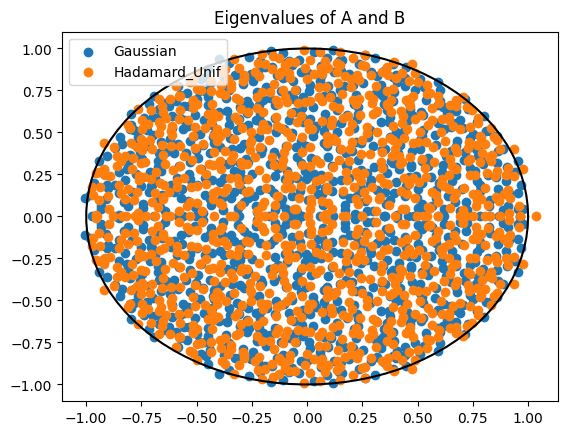

In [45]:
M = 2**10
H = scipy.linalg.hadamard(M)/jnp.sqrt(M)

key, key_D = jax.random.split(key)

D = jax.random.uniform(key_D, (M,))
D = jnp.sqrt(3)*(2*D-1)
B = H @ jnp.diag(D) 


# Scatter eigenvalues of B on complex plane
eigs = jnp.linalg.eigvals(A)
plt.scatter(eigs.real, eigs.imag, label='Gaussian')

eigs = jnp.linalg.eigvals(B)
plt.scatter(eigs.real, eigs.imag, label='Hadamard_Unif')

# plot a unit circle
t = jnp.linspace(0, 2*jnp.pi, 100)
plt.plot(jnp.cos(t), jnp.sin(t), color='black')

plt.title("Eigenvalues of A and B")
plt.legend()
plt.show()

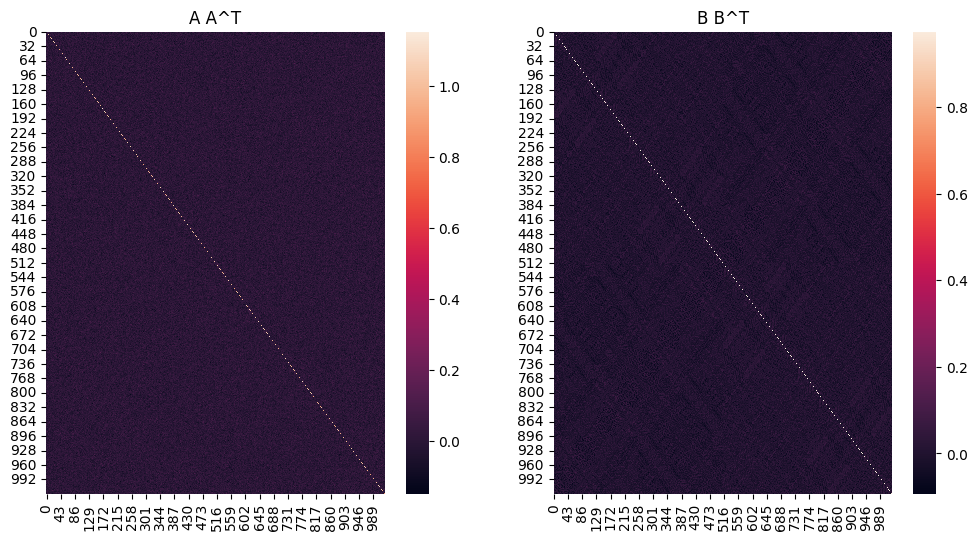

In [46]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmap of A @ A.T on the first subplot
sns.heatmap(A @ A.T, ax=axes[0])
axes[0].set_title("A A^T")

# Plot heatmap of B @ B.T on the second subplot
sns.heatmap(B @ B.T, ax=axes[1])
axes[1].set_title("B B^T")

# Show the plots
plt.show()

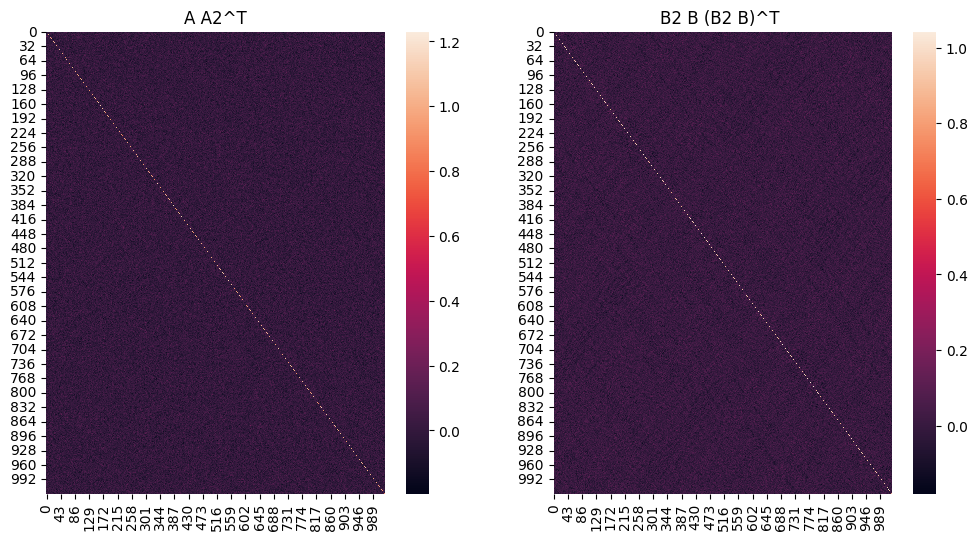

In [47]:
key, key_D2 = jax.random.split(key)

D2 = jax.random.uniform(key_D2, (M,))
D2 = jnp.sqrt(3)*(2*D2-1)
B2 = H @ jnp.diag(D2) 

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmap of A @ A.T on the first subplot
sns.heatmap(A2 @ A @ A.T @ A2.T, ax=axes[0])
axes[0].set_title("A A2^T")

# Plot heatmap of B @ B.T on the second subplot
sns.heatmap(B2 @ B @ B.T @ B2.T, ax=axes[1])
axes[1].set_title("B2 B (B2 B)^T ")

# Show the plots
plt.show()

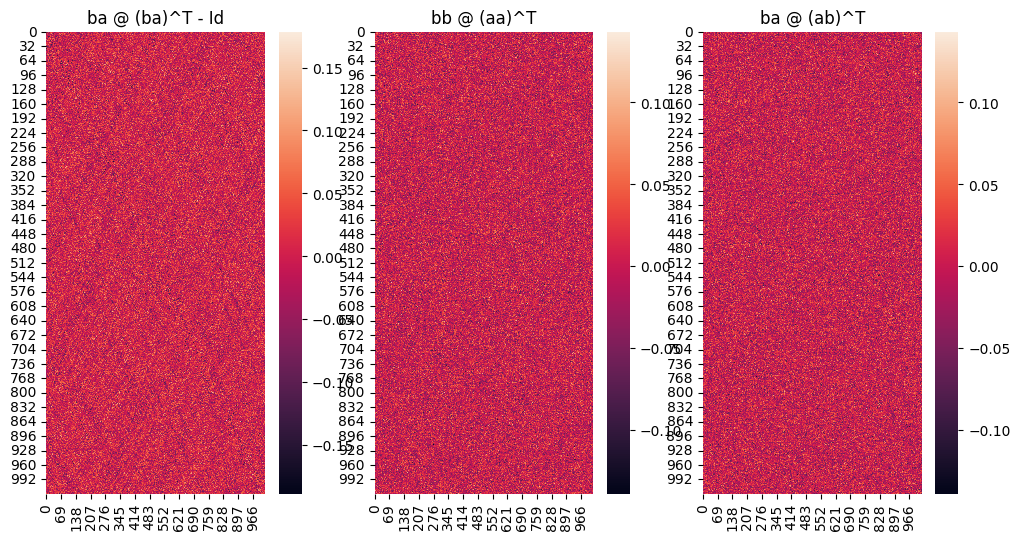

In [48]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot heatmap of A @ A.T on the first subplot
sns.heatmap(B2 @ B @ (B2 @ B).T - jnp.eye(M), ax=axes[0])
axes[0].set_title("ba @ (ba)^T - Id")

# Plot heatmap of B @ B.T on the second subplot
sns.heatmap(B2 @ B2 @ B.T @ B.T, ax=axes[1])
axes[1].set_title("bb @ (aa)^T")

# Plot heatmap of B @ B.T on the second subplot
sns.heatmap(B2 @ B @ (B @ B2).T, ax=axes[2])
axes[2].set_title("ba @ (ab)^T")

# Show the plots
plt.show()

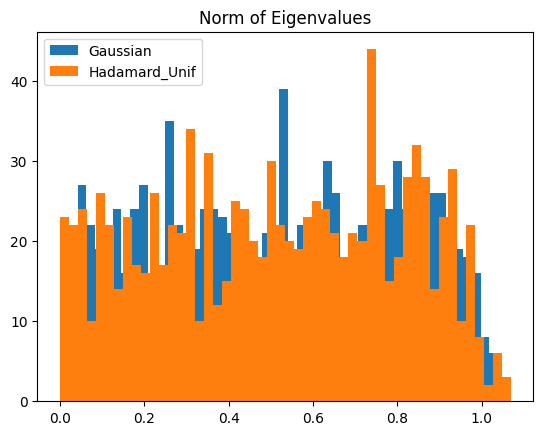

In [49]:
eigs = jnp.linalg.eigvals(A)
norms = eigs.real**2 + eigs.imag**2
plt.hist(norms, bins=50, label='Gaussian')

eigs = jnp.linalg.eigvals(B)
norms = eigs.real**2 + eigs.imag**2
plt.hist(norms, bins=50, label='Hadamard_Unif')

plt.title("Norm of Eigenvalues")
plt.legend()
plt.show()

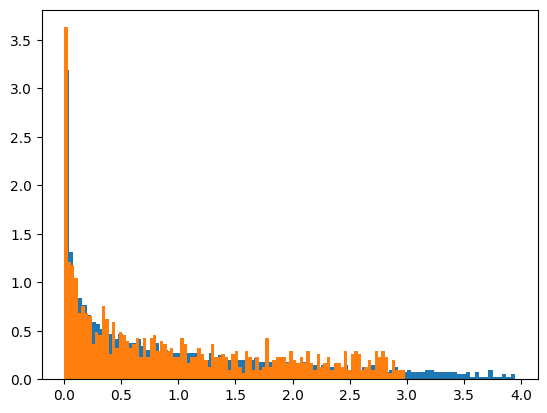

In [50]:
# Plot kde of spectrum of A

eigs = jnp.linalg.eigvals(A@A.T).real
plt.hist(eigs, bins=100, density=True)

eigs = jnp.linalg.eigvals(B@B.T).real
plt.hist(eigs, bins=100, density=True)

plt.show()

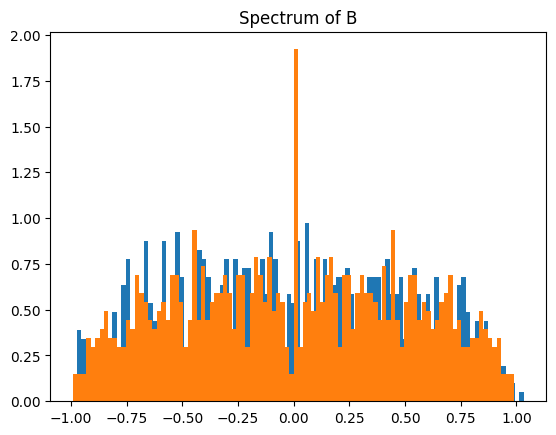

In [51]:
# Plot kde of spectrum of A
eigs = jnp.linalg.eigvals(B)

plt.hist(eigs.real, bins=100, density=True, label="Real")
plt.hist(eigs.imag, bins=100, density=True, label="Imaginary")

plt.title("Spectrum of B")
plt.show()

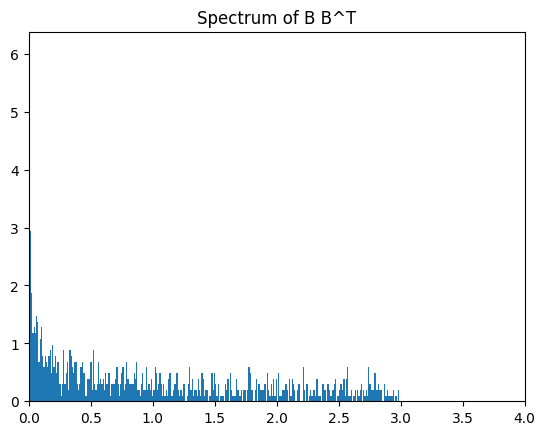

In [52]:
# Plot kde of spectrum of A
eigs = jnp.linalg.eigvals(B@B.T).real
plt.hist(eigs, bins=300, density=True)
plt.xlim(0, 4)

plt.title("Spectrum of B B^T")
plt.show()

# Rademacher Hadamard

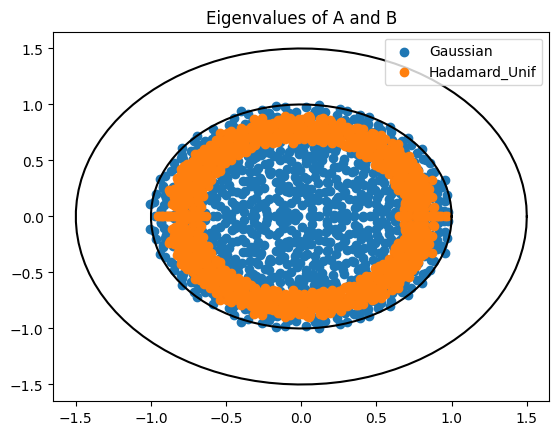

In [53]:
M = 2**10
H = scipy.linalg.hadamard(M)/jnp.sqrt(M)

key, *key_D = jax.random.split(key, 3)

D_rad = jax.random.rademacher(key_D[0], (M,))
D_unif = jax.random.uniform(key_D[1], (M,))
#D =  .64 * (D_unif + 1) * D_rad
D = (D_unif + .35) * D_rad
B = H @ jnp.diag(D) 


# Scatter eigenvalues of B on complex plane
eigs = jnp.linalg.eigvals(A)
plt.scatter(eigs.real, eigs.imag, label='Gaussian')

eigs = jnp.linalg.eigvals(B)
plt.scatter(eigs.real, eigs.imag, label='Hadamard_Unif')

# plot a unit circle
t = jnp.linspace(0, 2*jnp.pi, 100)
plt.plot(jnp.cos(t), jnp.sin(t), color='black')
plt.plot(1.5*jnp.cos(t), 1.5*jnp.sin(t), color='black')

plt.title("Eigenvalues of A and B")
plt.legend()
plt.show()

## Other Hadamard

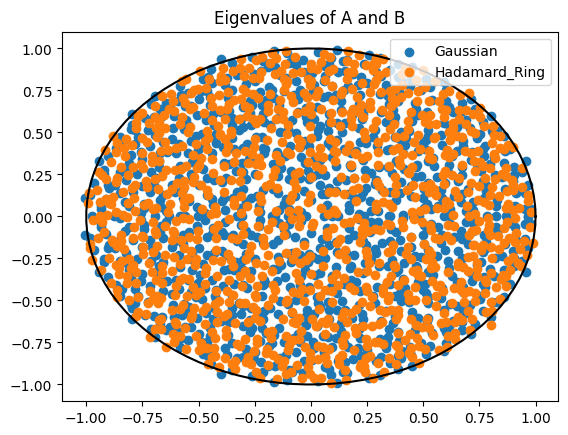

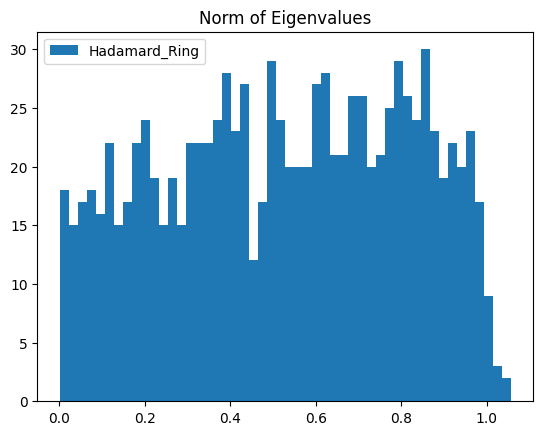

In [54]:
M = 2**10
H = scipy.linalg.hadamard(M)/jnp.sqrt(M)

key, key_D = jax.random.split(key)

def scaler(x):
    return jnp.sqrt(3)*(2*x - 1)

D = jax.random.uniform(key_D, (2*M,))
D1, D2 = D[:M], D[M:]
D = scaler(D1) * jnp.exp(1j*2*jnp.pi*D2)
B = H @ jnp.diag(D) 


# Scatter eigenvalues of B on complex plane
eigs = jnp.linalg.eigvals(A)
plt.scatter(eigs.real, eigs.imag, label='Gaussian')

eigs = jnp.linalg.eigvals(B)
plt.scatter(eigs.real, eigs.imag, label='Hadamard_Ring')

# plot a unit circle
t = jnp.linspace(0, 2*jnp.pi, 100)
plt.plot(jnp.cos(t), jnp.sin(t), color='black')

plt.title("Eigenvalues of A and B")
plt.legend()
plt.show()


norms = eigs.real**2 + eigs.imag**2
plt.hist(norms, bins=50, label='Hadamard_Ring')

plt.title("Norm of Eigenvalues")
plt.legend()
plt.show()

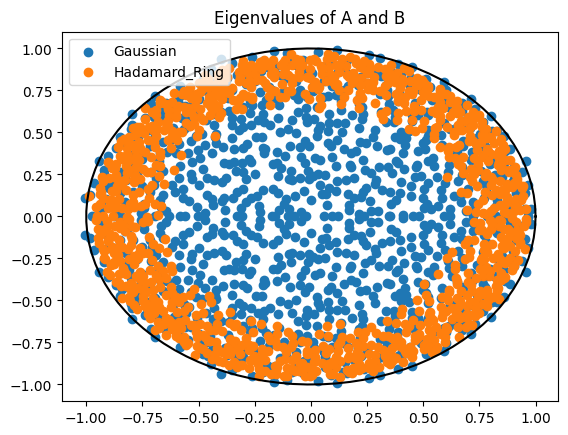

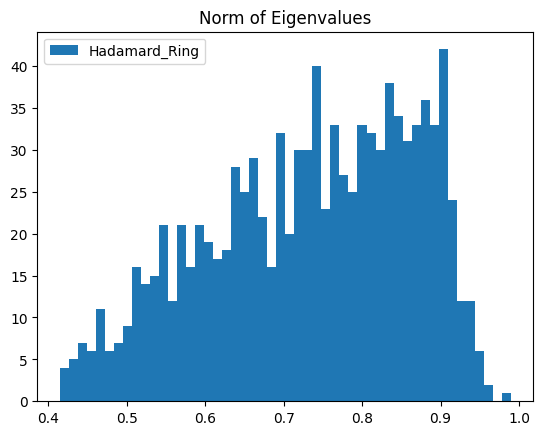

In [55]:
M = 2**10
H = scipy.linalg.hadamard(M)/jnp.sqrt(M)

key, key_D = jax.random.split(key)

rmin, rmax = .2, 1.36
def scaler(x):
    return jnp.sqrt(rmin**2 + (rmax**2 - rmin**2) * x)

D = jax.random.uniform(key_D, (2*M,))
D1, D2 = D[:M], D[M:]
D = scaler(D1) * jnp.exp(1j*2*jnp.pi*D2)
B = H @ jnp.diag(D) 


# Scatter eigenvalues of B on complex plane
eigs = jnp.linalg.eigvals(A)
plt.scatter(eigs.real, eigs.imag, label='Gaussian')

eigs = jnp.linalg.eigvals(B)
plt.scatter(eigs.real, eigs.imag, label='Hadamard_Ring')

# plot a unit circle
t = jnp.linspace(0, 2*jnp.pi, 100)
plt.plot(jnp.cos(t), jnp.sin(t), color='black')

plt.title("Eigenvalues of A and B")
plt.legend()
plt.show()


norms = eigs.real**2 + eigs.imag**2
plt.hist(norms, bins=50, label='Hadamard_Ring')

plt.title("Norm of Eigenvalues")
plt.legend()
plt.show()

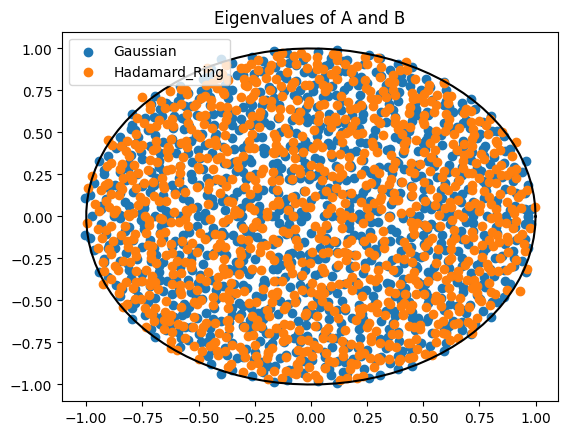

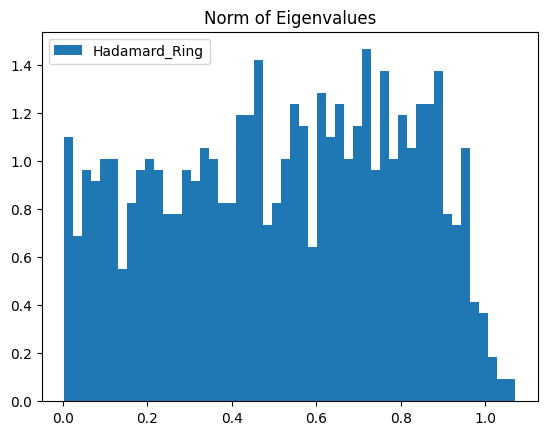

In [56]:
M = 2**10
H = scipy.linalg.hadamard(M)/jnp.sqrt(M)

key, key_D = jax.random.split(key)

rmin, rmax = .2, 1.36

def scaler(x):
    return jnp.sqrt(1/.35)*(x)

D = jax.random.uniform(key_D, (2*M, ))
D1, D2 = D[:M], D[M:]
D = scaler(D1) * jnp.exp(1j*2*jnp.pi*D2)
B = H @ jnp.diag(D) 


# Scatter eigenvalues of B on complex plane
eigs = jnp.linalg.eigvals(A)
plt.scatter(eigs.real, eigs.imag, label='Gaussian')

eigs = jnp.linalg.eigvals(B)
plt.scatter(eigs.real, eigs.imag, label='Hadamard_Ring')

# plot a unit circle
t = jnp.linspace(0, 2*jnp.pi, 100)
plt.plot(jnp.cos(t), jnp.sin(t), color='black')

plt.title("Eigenvalues of A and B")
plt.legend()
plt.show()

norms = eigs.real**2 + eigs.imag**2
plt.hist(norms, bins=50, label='Hadamard_Ring', density=True)

plt.title("Norm of Eigenvalues")
plt.legend()
plt.show()

## Gaussian Hadamard

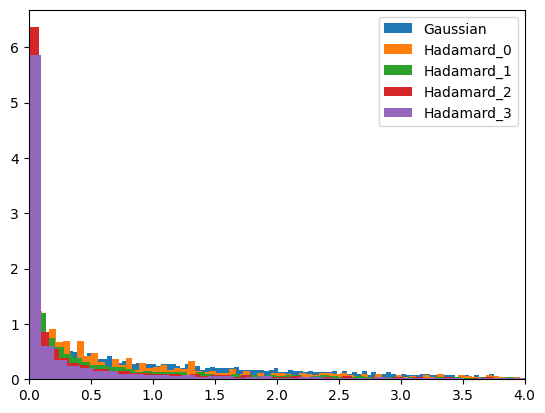

In [57]:
# Plot kde of spectrum of A
eigs = jnp.linalg.eigvals(A@A.T).real
plt.hist(eigs, bins=100, density=True, label="Gaussian")

M = 2**10
H = scipy.linalg.hadamard(M)

key, *keys_D = jax.random.split(key, 5)
Ds = [jax.random.normal(keys_D[i], (M,)) for i in range(4)] 
B = jnp.eye(M)

for i in range(4):
    D = Ds[i]
    B = B @ H @ jnp.diag(D) * 1/jnp.sqrt(M)

    eigs = jnp.linalg.eigvals(B@B.T).real
    plt.hist(eigs, bins=300, density=True, label="Hadamard_{}".format(i))

plt.legend()
plt.xlim(0, 4)
plt.show()

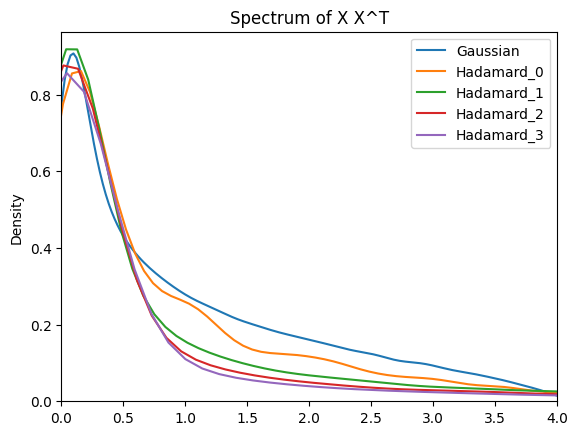

In [58]:
M = 2**10

## Gaussian matrix
key, key_A = jax.random.split(key)
A = 1/jnp.sqrt(M)*jax.random.normal(key_A, (M, M))
eigs = jnp.linalg.eigvals(A@A.T).real
# Plot spectrum 
sns.kdeplot(eigs, bw_adjust=0.5, label="Gaussian")


## Structured Sparsity
H = scipy.linalg.hadamard(M)/jnp.sqrt(M)
key, *keys_D = jax.random.split(key, 5)
Ds = [jax.random.normal(keys_D[i], (M,)) for i in range(4)] 
B = jnp.eye(M)

for i in range(4):
    D = Ds[i]
    B = B @ H @ jnp.diag(D)

    eigs = jnp.linalg.eigvals(B@B.T).real
    sns.kdeplot(eigs, bw_adjust=0.5, label="Hadamard_{}".format(i))

plt.title("Spectrum of X X^T")
plt.legend()
plt.xlim(0, 4)
plt.show()

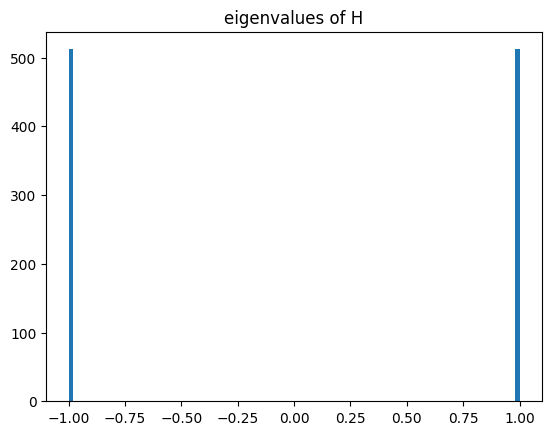

In [59]:
plt.hist(jnp.linalg.eigvals(H).real, bins=100)
plt.title("eigenvalues of H")
plt.show()